### In the phase - I of the project, we have cleaned our data, and performed various visualizations on the data to draw meaningful inferences. 
### In the phase - II, we implement various algorithms on the cleaned data set and compare the results.
### As we were suggested to replace the missing values with 0's instead of the median, the same change has been reflected in our code and it helped us in achieving a better accuracy.

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,precision_recall_curve,classification_report
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import LabelEncoder



In [2]:
# Reading both train_eda and test_eda files into dataframes
air_train_df, air_test_df = pd.read_csv("train.csv"), pd.read_csv("test.csv")

In [3]:
print("The number of rows in train.csv are:",air_train_df.shape[0])
print("The number of rows in test.csv are:",air_test_df.shape[0])

The number of rows in train.csv are: 103904
The number of rows in test.csv are: 25976


In [4]:
'''Concatenating both the dataframes into a single one. The resultant dataframe will have the rows of train.csv
followed by test.csv'''
f_df = pd.concat([air_train_df, air_test_df])
print("The number of rows after merging the two csv files:", f_df.shape[0])

The number of rows after merging the two csv files: 129880


In [5]:
# Shape function gives the number of rows and columns in the data frame.
f_df.shape

(129880, 25)

In [6]:
f_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
# dropping the unecessary column
f_df = f_df.drop('Unnamed: 0', axis=1)
f_df = f_df.drop('id', axis=1)

In [8]:
f_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
print(f_df.shape[0]) # to find total number of rows in the dataset
print(f_df.notna().all(axis=1).sum()) # to find the count of rows that do not have even a single missing value

129880
129487


In [10]:
print(f_df.isna().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


In [11]:
#filling the missing values with 0
f_df['Arrival Delay in Minutes'].fillna(0, inplace=True)

In [12]:
print(f_df.isna().sum())

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [13]:
# Based on the heat map, we have decided to eliminate 'Departure Delay in Minutes' as it is highly correlated with 'Arrival Delay in Minutes'.
f_df = f_df.drop('Departure Delay in Minutes' , axis=1)

In [14]:
f_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0.0,satisfied


In [15]:
f_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Minutes', 'satisfaction'],
      dtype='object')

In [16]:
# CLASS BALANCING
# This consists only of the rows that have the specified value
nod_sat_df = f_df
nod_df = f_df
nod_df = nod_df[nod_df['satisfaction'] == "neutral or dissatisfied"]
nod_df = nod_df.drop(nod_df.index[:18000])
# now from nod_sat_df drop rows consisting of that value
nod_sat_df = nod_sat_df.drop(nod_sat_df[nod_sat_df['satisfaction'] == 'neutral or dissatisfied'].index)
#now concatenate the two dataframes
df = pd.concat([nod_sat_df, nod_df])
print("Final shape of the dataframe after class balancing:",df.shape)

Final shape of the dataframe after class balancing: (90934, 22)


In [17]:
f_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0.0,satisfied


In [18]:
# Removing outliers
f, l = 0.25, 0.75
q1, q3 = df.quantile(f), df.quantile(l)
q3 - q1

Age                                    24.0
Flight Distance                      1374.0
Inflight wifi service                   2.0
Departure/Arrival time convenient       2.0
Ease of Online booking                  2.0
Gate location                           2.0
Food and drink                          2.0
Online boarding                         2.0
Seat comfort                            2.0
Inflight entertainment                  3.0
On-board service                        1.0
Leg room service                        2.0
Baggage handling                        2.0
Checkin service                         1.0
Inflight service                        2.0
Cleanliness                             2.0
Arrival Delay in Minutes               13.0
dtype: float64

In [19]:
i, j = (df < (q1 - 1.5 * (q3-q1))), (df > (q3 + 1.5 * (q3-q1)))
df = df[~(i|j).any(axis=1)]
df.shape

C:\Users\Sriinitha Reddy\AppData\Local\Temp\ipykernel_8\3660832867.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  i, j = (df < (q1 - 1.5 * (q3-q1))), (df > (q3 + 1.5 * (q3-q1)))


(62092, 22)

In [20]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0.0,satisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,5,4,5,4,0.0,satisfied
13,Male,Loyal Customer,33,Personal Travel,Eco,946,4,2,4,3,...,4,4,4,5,2,2,2,4,0.0,satisfied
17,Male,Loyal Customer,41,Business travel,Business,2075,4,4,2,4,...,4,5,5,5,5,3,5,5,10.0,satisfied
26,Female,Loyal Customer,33,Business travel,Business,1561,1,1,1,1,...,3,4,4,4,3,5,4,2,0.0,satisfied


## The data has few categorical columns, before we train the model with our data, we need to convert these values to numerical values. We convert all categorical values except the target column.

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['Gender', 'Customer Type', 'Type of Travel','Class']
for i in cat_col:
    df[i] = le.fit_transform(df[i])

In [22]:
# Number of columns in the dataset after performing label encoding
print("The shape of the dataframe after encoding the categorical values:",df.shape)

The shape of the dataframe after encoding the categorical values: (62092, 22)


In [23]:
# Normalizing the data
def norm_age_flight(colsi):
    mincol, maxcol = df[colsi].min(), df[colsi].max()
    df[colsi] = (df[colsi] - mincol) / (maxcol - mincol)
    return df

In [24]:
cols = ['Age', 'Flight Distance']
for i in cols:
    norm_age_flight(cols)

In [25]:
df[['Age', 'Flight Distance']]

,Age,Flight Distance
4,0.692308,0.047818
7,0.576923,0.523648
13,0.333333,0.239091
17,0.435897,0.534100
26,0.333333,0.399791
...,...,...
25952,0.679487,0.235171
25955,0.743590,0.638620
25960,0.205128,0.108701
25966,0.448718,0.259472


In [26]:
X = df.drop(['satisfaction'], axis=1)
#X
y = df['satisfaction']
y

4                      satisfied
7                      satisfied
13                     satisfied
17                     satisfied
26                     satisfied
                  ...           
25952    neutral or dissatisfied
25955    neutral or dissatisfied
25960    neutral or dissatisfied
25966    neutral or dissatisfied
25973    neutral or dissatisfied
Name: satisfaction, Length: 62092, dtype: object

In [27]:
# Split the data into test and train
from sklearn.model_selection import train_test_split,RandomizedSearchCV, cross_val_score
X_train ,X_test,y_train ,y_test =train_test_split(X,y,test_size =.2 , random_state=42 , stratify=y)

In [28]:
print("Shape of X_train, X_test",X_train.shape, X_test.shape)
print("Shape of y_train, y_test",y_train.shape, y_test.shape)

Shape of X_train, X_test (49673, 21) (12419, 21)
Shape of y_train, y_test (49673,) (12419,)


# Logistic Regression

In [29]:
# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent_reg = accuracy*100
print('Accuracy achieved using Logistic Regression model:', accuracy_percent_reg)

Accuracy achieved using Logistic Regression model: 87.52717610113537


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Result Visualizations for Logistic Regression Model

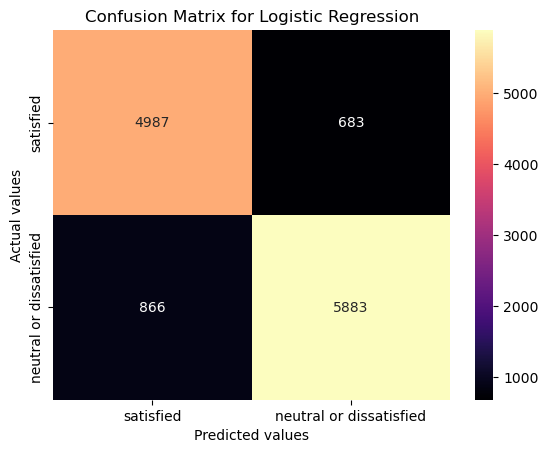

In [30]:
cm = confusion_matrix(y_test, y_pred)
binary_classes = ['satisfied', 'neutral or dissatisfied']
sns.heatmap(cm, annot=True, fmt='d', cmap='magma',xticklabels=binary_classes, yticklabels=binary_classes)
plt.title('Confusion Matrix for Logistic Regression');plt.xlabel('Predicted values');plt.ylabel('Actual values')
plt.show()


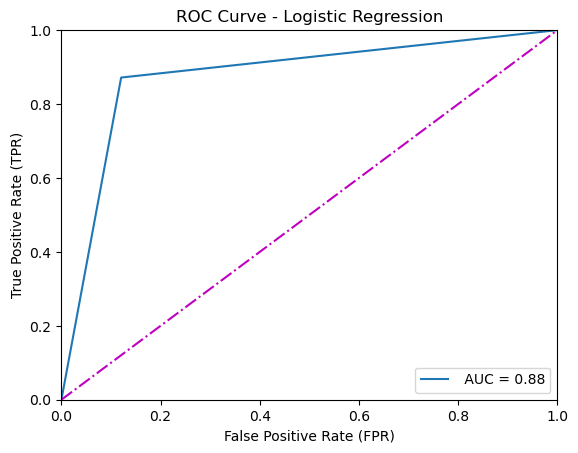

In [31]:
label_en = LabelEncoder()
y_test_transformed = label_en.fit_transform(y_test)
y_pred_transformed = label_en.transform(y_pred)
f_p, t_p, thresholds = roc_curve(y_test_transformed, y_pred_transformed); roc_auc = auc(f_p, t_p)
plt.plot(f_p, t_p, label=' AUC = %0.2f' % roc_auc)
plt.plot((0.0, 1.0), (0.0, 1.0), 'm-.') 
plt.title('ROC Curve - Logistic Regression'); plt.xlabel('False Positive Rate (FPR)'); plt.ylabel('True Positive Rate (TPR)')
plt.xlim(0.0,1.0);plt.ylim(0.0, 1.0)
plt.legend(loc="lower right")
plt.show()

# K- nearest Neighbour

In [32]:
import warnings
from sklearn.neighbors import KNeighborsClassifier
param_k = range(1,11)
accuracies_k = []
y_pred_highest = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    for k in param_k:
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)
        if k ==5:
            y_pred_highest = y_pred
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_percent_knn = accuracy*100
        accuracies_k.append(accuracy_percent_knn)
        print('Accuracy achieved using K-nearest neighbour algorithm when k= {} is {}'.format(k,accuracy_percent_knn))

Accuracy achieved using K-nearest neighbour algorithm when k= 1 is 90.74804734680731
Accuracy achieved using K-nearest neighbour algorithm when k= 2 is 90.63531685320879
Accuracy achieved using K-nearest neighbour algorithm when k= 3 is 91.74651743296562
Accuracy achieved using K-nearest neighbour algorithm when k= 4 is 91.40027377405589
Accuracy achieved using K-nearest neighbour algorithm when k= 5 is 91.93171752959175
Accuracy achieved using K-nearest neighbour algorithm when k= 6 is 91.49689991142604
Accuracy achieved using K-nearest neighbour algorithm when k= 7 is 91.85924792656414
Accuracy achieved using K-nearest neighbour algorithm when k= 8 is 91.7545696110798
Accuracy achieved using K-nearest neighbour algorithm when k= 9 is 92.01223931073356
Accuracy achieved using K-nearest neighbour algorithm when k= 10 is 91.60963040502456


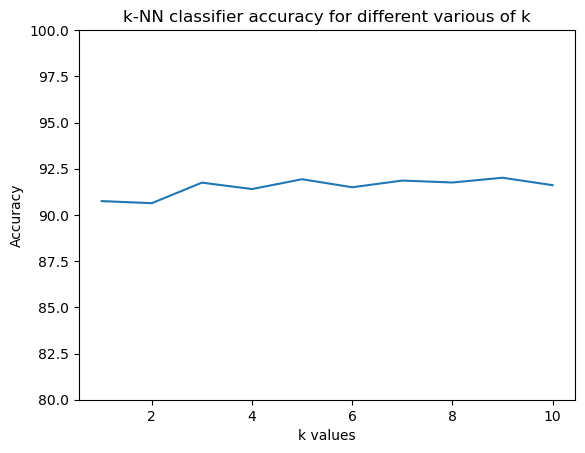

In [33]:
plt.plot(param_k, accuracies_k)
plt.title('k-NN classifier accuracy for different various of k');plt.xlabel('k values'); plt.ylabel('Accuracy')
plt.ylim(80,100)
plt.show()

## Result Visualizations for  K-nearest Neighbour

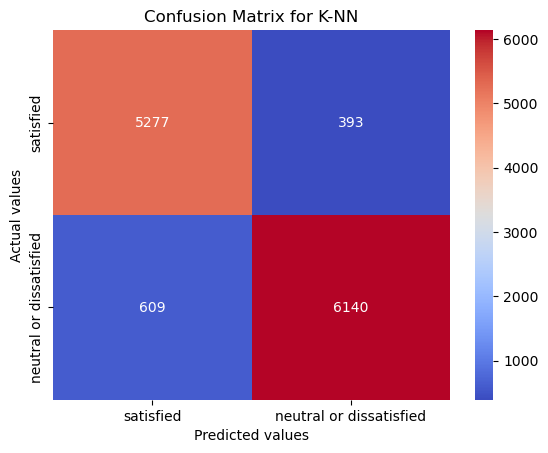

In [34]:
cm = confusion_matrix(y_test, y_pred_highest)
classes = ['satisfied', 'neutral or dissatisfied']
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix for K-NN');plt.xlabel('Predicted values');plt.ylabel('Actual values')
plt.show()


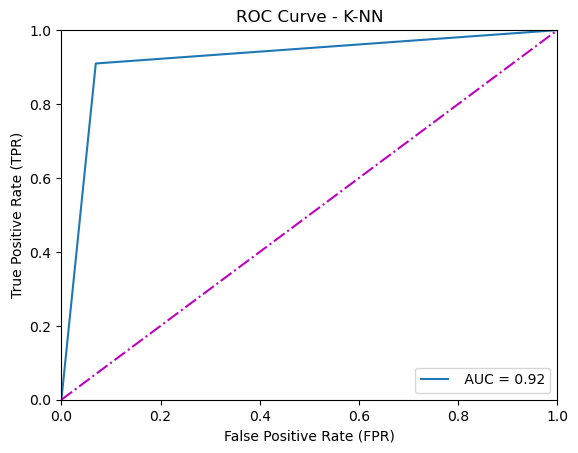

In [35]:
label_en = LabelEncoder()
y_test_transformed = label_en.fit_transform(y_test)
y_pred_transformed = label_en.transform(y_pred_highest)
f_p, t_p, thresholds = roc_curve(y_test_transformed, y_pred_transformed); roc_auc = auc(f_p, t_p)
plt.plot(f_p, t_p, label=' AUC = %0.2f' % roc_auc)
plt.plot((0.0, 1.0), (0.0, 1.0), 'm-.') 
plt.title('ROC Curve - K-NN'); plt.xlabel('False Positive Rate (FPR)'); plt.ylabel('True Positive Rate (TPR)')
plt.xlim(0.0,1.0);plt.ylim(0.0, 1.0)
plt.legend(loc="lower right")
plt.show()

### Naive Baye's Algorithm

In [36]:
# NAIVE BAYE'S ALGORITHM
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() 
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent_nb = accuracy*100
print('Accuracy using Naive Bayes algorithm:', accuracy_percent_nb)

Accuracy using Naive Bayes algorithm: 86.23882760286658


### Result Visualizations for Naive Baye's

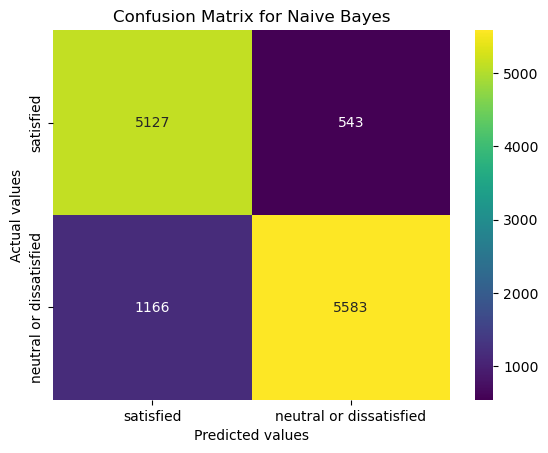

In [37]:
cm = confusion_matrix(y_test, y_pred)
classes = ['satisfied', 'neutral or dissatisfied']
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix for Naive Bayes');plt.xlabel('Predicted values');plt.ylabel('Actual values')
plt.show()

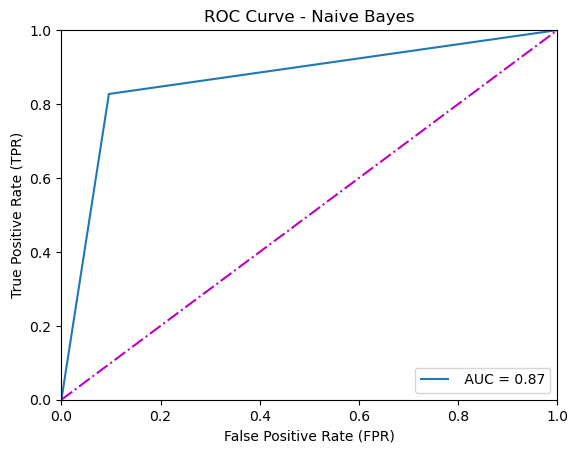

In [38]:
label_en = LabelEncoder()
y_test_transformed = label_en.fit_transform(y_test)
y_pred_transformed = label_en.transform(y_pred)
f_p, t_p, thresholds = roc_curve(y_test_transformed, y_pred_transformed); roc_auc = auc(f_p, t_p)
plt.plot(f_p, t_p, label=' AUC = %0.2f' % roc_auc)
plt.plot((0.0, 1.0), (0.0, 1.0), 'm-.') 
plt.title('ROC Curve - Naive Bayes'); plt.xlabel('False Positive Rate (FPR)'); plt.ylabel('True Positive Rate (TPR)')
plt.xlim(0.0,1.0);plt.ylim(0.0, 1.0)
plt.legend(loc="lower right")
plt.show()

## Algorithms other than the one's taught in class

### Support Vector Machine (SVM)

In [39]:
# SVM ALGORITHM IMPLEMENTATION
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent_svm = accuracy*100
print('Accuracy using Support Vector Machine:', accuracy_percent_svm)

Accuracy using Support Vector Machine: 87.98615025364361


### Result Visualizations for SVM

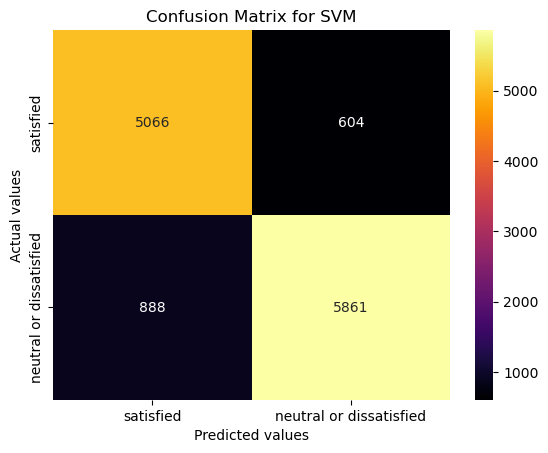

In [40]:
matrix = confusion_matrix(y_test, y_pred)
classes = ['satisfied', 'neutral or dissatisfied']
sns.heatmap(matrix, annot=True, fmt='d', cmap='inferno',xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix for SVM');plt.xlabel('Predicted values');plt.ylabel('Actual values')
plt.show()

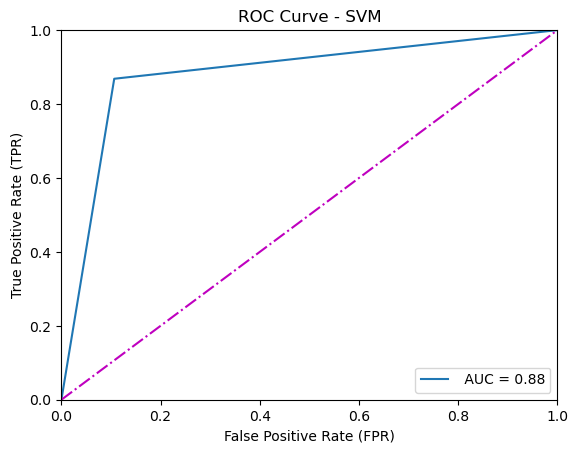

In [41]:
label_en = LabelEncoder()
y_test_transformed = label_en.fit_transform(y_test)
y_pred_transformed = label_en.transform(y_pred)
f_p, t_p, thresholds = roc_curve(y_test_transformed, y_pred_transformed); roc_auc = auc(f_p, t_p)
plt.plot(f_p, t_p, label=' AUC = %0.2f' % roc_auc)
plt.plot((0.0, 1.0), (0.0, 1.0), 'm-.') 
plt.title('ROC Curve - SVM'); plt.xlabel('False Positive Rate (FPR)'); plt.ylabel('True Positive Rate (TPR)')
plt.xlim(0.0,1.0);plt.ylim(0.0, 1.0)
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()
ex.fit(X,y)
colss = X.columns

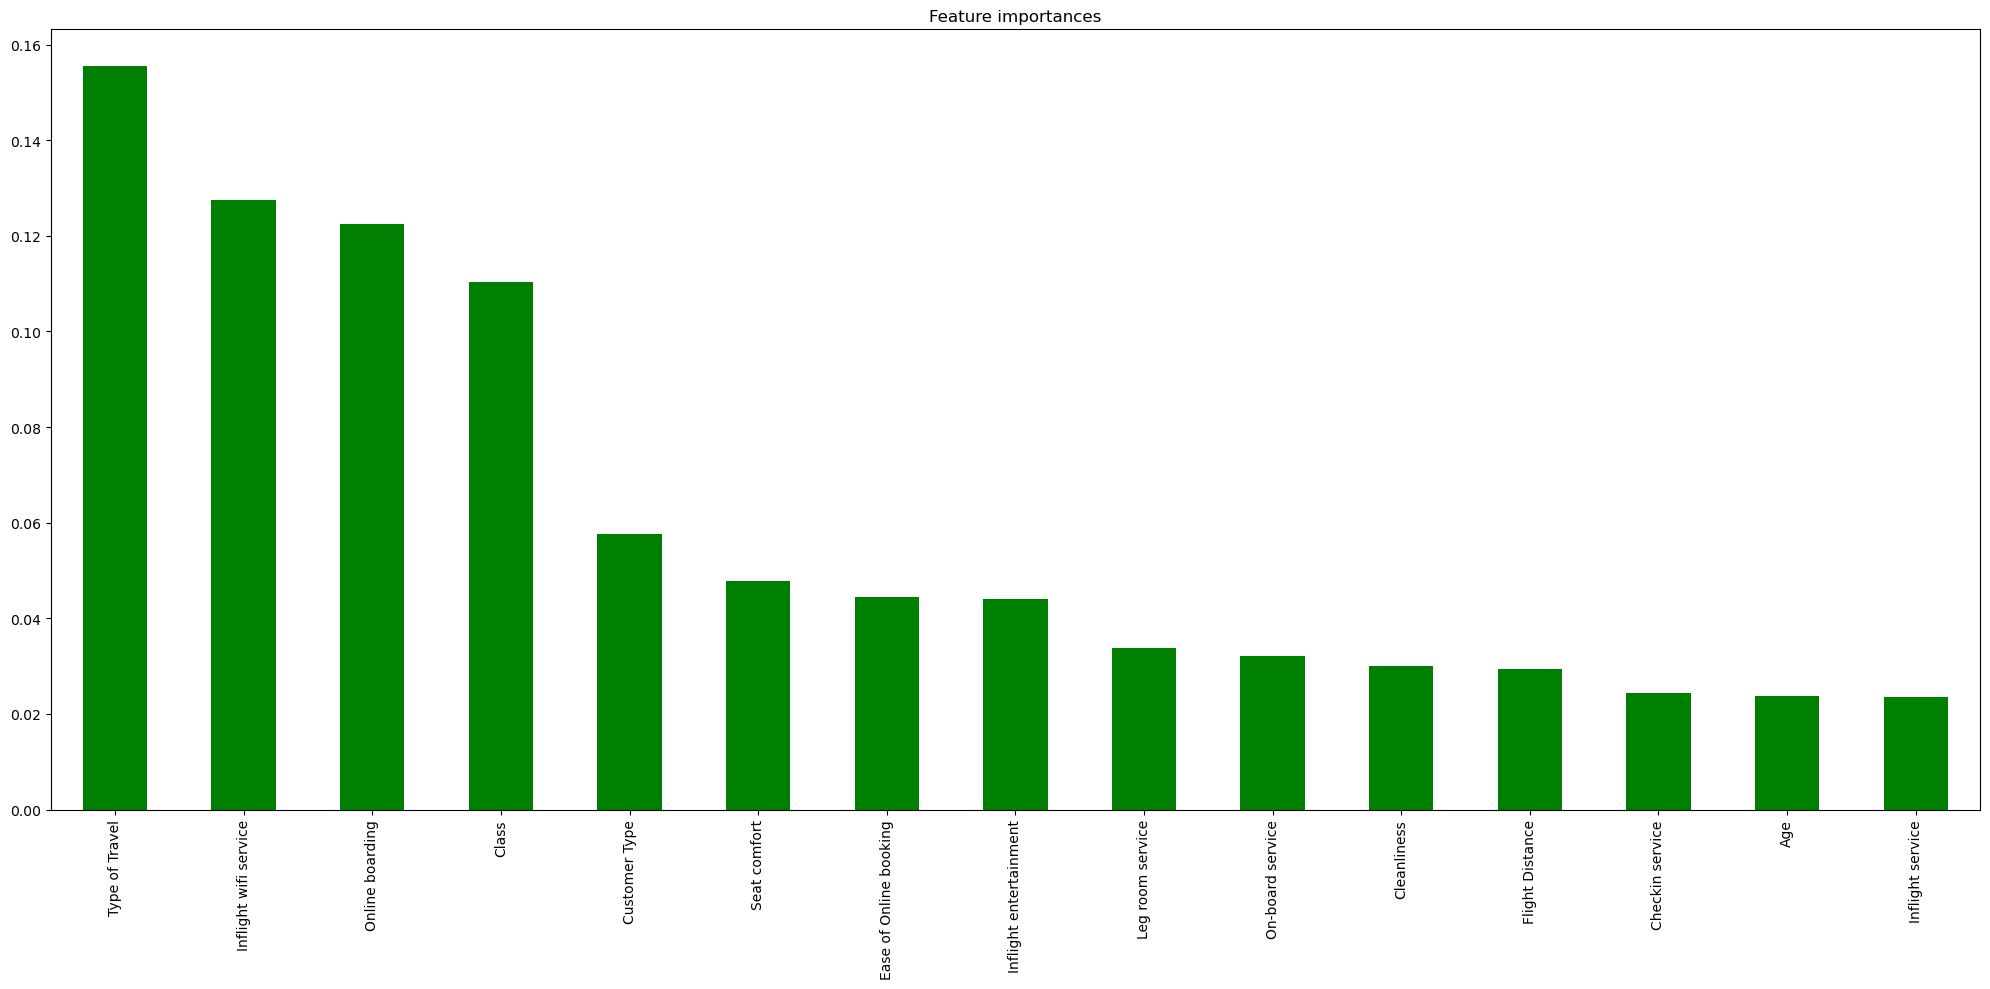

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title('Feature importances')
feat=pd.Series(ex.feature_importances_,index=colss)
feat.nlargest(15).plot(kind='bar', color="g", align="center")
plt.tight_layout()
plt.grid(False)
plt.show()

In [44]:
print(X.columns)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Minutes'],
      dtype='object')


In [45]:
X.drop(['Gender','Age','Departure/Arrival time convenient','Gate location','Food and drink'],axis=1,inplace=True)

In [46]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

In [47]:
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent_rfc = accuracy*100
print('Accuracy achieved using Random forest:', accuracy_percent_rfc)

Accuracy achieved using Random forest: 95.61961510588614


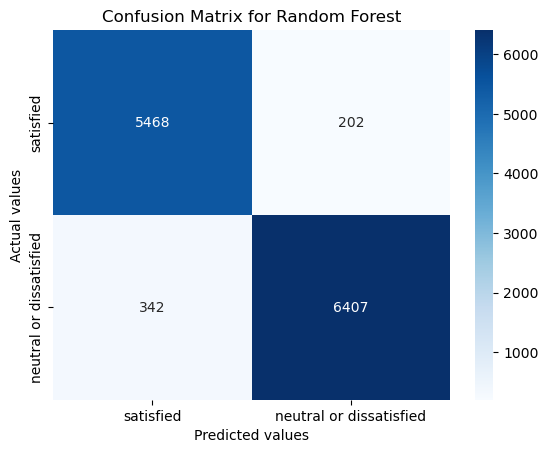

In [48]:
cm = confusion_matrix(y_test, y_pred)
classes = ['satisfied', 'neutral or dissatisfied']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix for Random Forest');plt.xlabel('Predicted values');plt.ylabel('Actual values')
plt.show()

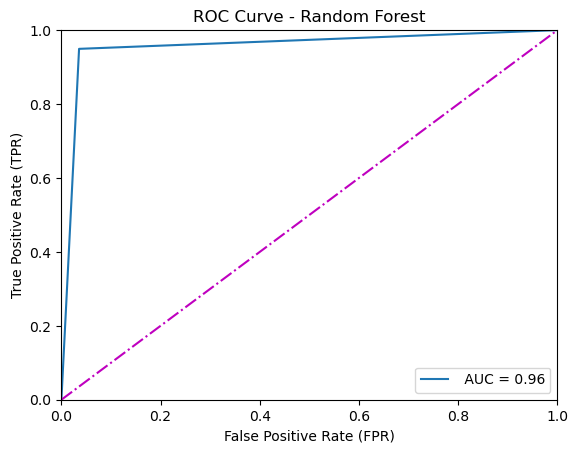

In [49]:
label_en = LabelEncoder()
y_test_transformed = label_en.fit_transform(y_test)
y_pred_transformed = label_en.transform(y_pred)
f_p, t_p, thresholds = roc_curve(y_test_transformed, y_pred_transformed); roc_auc = auc(f_p, t_p)
plt.plot(f_p, t_p, label=' AUC = %0.2f' % roc_auc)
plt.plot((0.0, 1.0), (0.0, 1.0), 'm-.') 
plt.title('ROC Curve - Random Forest'); plt.xlabel('False Positive Rate (FPR)'); plt.ylabel('True Positive Rate (TPR)')
plt.xlim(0.0,1.0);plt.ylim(0.0, 1.0)
plt.legend(loc="lower right")
plt.show()